In [1]:
#Assignment 1
#Relationship between solar radio flux F10.7 and sunspot number
#Team 12
#Yaroslav Savotin, Elizaveta Pestova, Selamawit
#Skoltech, 2023

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('D:\МАГИСТРАТУРА\Experimental Data Processing\Assignment 1\data_group_1.csv') #считываем файл данных в формате csv
#создаем датафрейм (df) при помощи считывания файла данных data_group4.csv в формате csv (файл данных с разделителями запятыми)
df.columns = ['year', 'month', 'monthly solar radio flux at 10.7 cm', 'monthly sunspot number'] #изменяем названия столбцов
#list(df) или df.columns #просмотр измененных названий столбцов



In [2]:
df

,year,month,monthly solar radio flux at 10.7 cm,monthly sunspot number
0,1964,4,72.6,12.9
1,1964,5,69.5,14.3
2,1964,6,69.0,13.5
3,1964,7,67.0,4.8
4,1964,8,69.3,13.8
...,...,...,...,...
394,1997,2,73.8,11.0
395,1997,3,73.5,12.1
396,1997,4,74.5,23.0
397,1997,5,74.6,25.4


In [3]:
df['data'] = pd.to_datetime((df['year'].astype ( str ) + df['month'].astype ( str )), format="%Y%m")
df

,year,month,monthly solar radio flux at 10.7 cm,monthly sunspot number,data
0,1964,4,72.6,12.9,1964-04-01
1,1964,5,69.5,14.3,1964-05-01
2,1964,6,69.0,13.5,1964-06-01
3,1964,7,67.0,4.8,1964-07-01
4,1964,8,69.3,13.8,1964-08-01
...,...,...,...,...,...
394,1997,2,73.8,11.0,1997-02-01
395,1997,3,73.5,12.1,1997-03-01
396,1997,4,74.5,23.0,1997-04-01
397,1997,5,74.6,25.4,1997-05-01


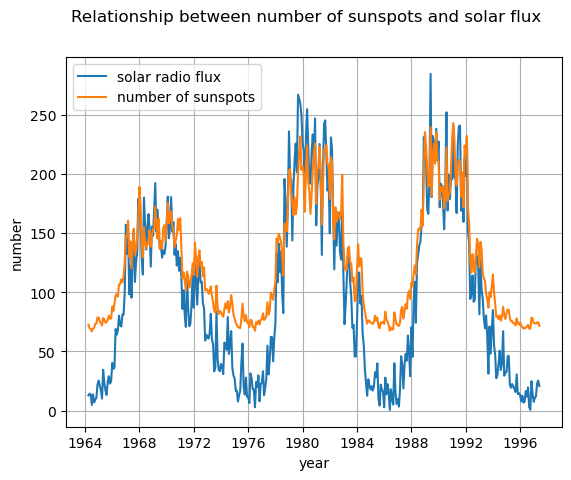

In [4]:
#------------№3------------

y1 = df["monthly sunspot number"]
y2 = df["monthly solar radio flux at 10.7 cm"]
x = df["data"]
plt.plot(x,y1,label = 'solar radio flux')
plt.plot(x,y2,label = 'number of sunspots')
plt.xlabel('year')
plt.ylabel('number')
plt.suptitle('Relationship between number of sunspots and solar flux')
plt.legend()
plt.grid(True)

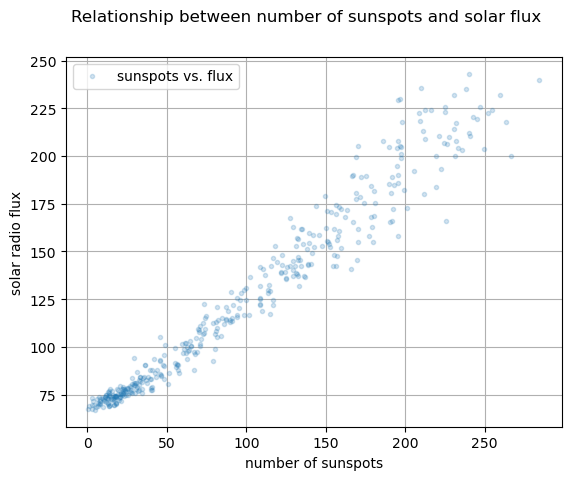

In [5]:
#------------№4------------
#для визуализации  зависимости между солнечным потоком и количеством пятен мы построим диаграмму рассеяния (scatter plot)
sunspots=df['monthly sunspot number']
flux=df['monthly solar radio flux at 10.7 cm']
plt.plot(sunspots, flux , 'o', alpha=0.2, markersize=3, label = 'sunspots vs. flux')
plt.legend()
plt.xlabel('number of sunspots')
plt.ylabel('solar radio flux')
plt.suptitle('Relationship between number of sunspots and solar flux')
plt.grid(True)

In [6]:
#Вывод:Наблюдается зависимость между количеством солнечных пятен и солнечным потоком

In [10]:
#------------№5------------
# monthly sunspot number
tryf = df['monthly sunspot number'].values[:]
def my_function(R):
    numrows = len(sunspots)
    R1 = [[0] for _ in range(numrows)]
    for i in range(0,399):
        if i in range(0,6):
            R1[i] = (R[i] + R[i+5] + R[i+4] + R[i+3] + R[i+2] + R[i+1])/6        
        if i in range(392,399):
            R1[i] = (R[i-5] + R[i-4] + R[i-3] + R[i-2] + R[i-1] + R[i])/6
        if i in range(6,392):
            R1[i] = (R[i-6])/24 + (R[i-5] + R[i-4] + R[i-3] + R[i-2] + R[i-1] + R[i] + R[i+5] + R[i+4] + R[i+3] + R[i+2] + R[i+1])/12 + (R[i+6])/24
    return R1
    
    
R1 = my_function(tryf)


In [11]:
#monthly solar radio flux at 10.7 cm
R = df['monthly solar radio flux at 10.7 cm'].values[:]
numrows = len(sunspots)
R2 = [[0] for _ in range(numrows)]
for i in range(0,399):
    if i in range(0,6):
        R2[i] = (R[i] + R[i+5] + R[i+4] + R[i+3] + R[i+2] + R[i+1])/6        
    if i in range(392,399):
        R2[i] = (R[i-5] + R[i-4] + R[i-3] + R[i-2] + R[i-1] + R[i])/6
    if i in range(6,392):
        R2[i] = (R[i-6])/24 + (R[i-5] + R[i-4] + R[i-3] + R[i-2] + R[i-1] + R[i] + R[i+5] + R[i+4] + R[i+3] + R[i+2] + R[i+1])/12 + (R[i+6])/24
#print(R2)


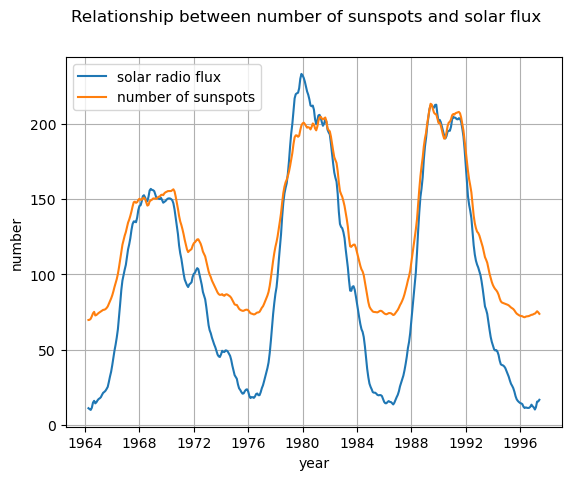

In [12]:
y1 = R1
y2 = R2
x = df['data'].values[:]
plt.plot(x,y1,label = 'solar radio flux')
plt.plot(x,y2,label = 'number of sunspots')
plt.xlabel('year')
plt.ylabel('number')
plt.suptitle('Relationship between number of sunspots and solar flux')
plt.legend()
plt.grid(True)

In [16]:
#------------№6-8------------

F_experemental = np.array(df['monthly solar radio flux at 10.7 cm'].values[:]) #Vector of dependent variables, regressand, solar radio flux at 10.7 cm
R = np.ones((399, 4))
#v = df['monthly sunspot number'].values[:]
v = R1
for i in range (0,399): #Matrix of independent variables, regressors,
    R[i,1] = v[i]
    R[i,2] = v[i]**2
    R[i,3] = v[i]**3
#(Rt*R)-1*Rt*F Vector of coefficients by LSM
Beta = np.matmul(np.linalg.inv(np.matmul(np.transpose(R),R)),np.matmul(np.transpose(R),R2))

F = np.ones((399, 1))

#------------№9------------
for i in range (0,399):
    F[i] = Beta[0] + Beta[1]*R[i,1] + Beta[2]*R[i,2] + Beta[3]*R[i,3]


In [17]:
#------------№10------------
error = 0
N = len(F_experemental)
for i in range(0,399):
    error += (F[i] - R2[i])**2
error = error/(N-1)
print(error)

[27.49999581]


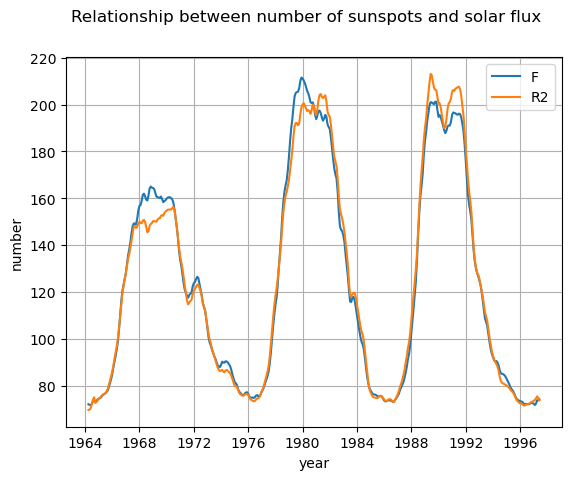

In [18]:
y1 = F
y2 = R2
x = df["data"]
plt.plot(x,y1,label = 'F')
plt.plot(x,y2,label = 'R2')
plt.xlabel('year')
plt.ylabel('number')
plt.suptitle('Relationship between number of sunspots and solar flux')
plt.legend()
plt.grid(True)